# Notebook for Bank Customer Segmentation with 1M+ Transactions

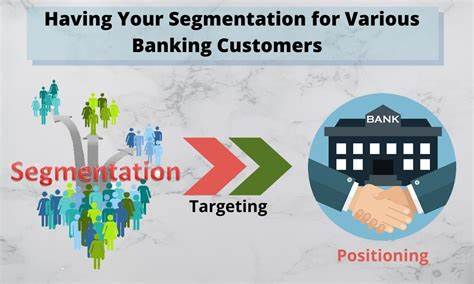

## Introduction 
Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

_According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations._

## Table of Contents

1. Importing Libraries
2. Importing Dataset
3. Data Preprocessing
4. Exploratory Data Analysis
5. Modelling
5. Model Validatio

# 1. Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import date,datetime

## 2. Loading Dataset
Pandas module used for inporting dataset 
<br>In read_csv() function, we have passed the location to where the files are located in the dphi official github page.

In [2]:
bank_transactions_df = pd.read_csv('bank_transactions.csv')

In [3]:
bank_transactions_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


## 3 Data Preprocessing

###  Summary Statistics and Feature Engineering

In [4]:
bank_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
bank_transactions_df.shape

(1048567, 9)

In [6]:
bank_transactions_df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [7]:
bank_transactions_df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [8]:
 bank_transactions_df.isnull().sum().sum()

7017

#### Dropping Null values

In [9]:
bank_transactions_dff = bank_transactions_df.copy()

In [10]:
#Dropping TransactionID, CustomerID in our dataset, we do not really need it in order to understand our data.
bank_transactions_dff.drop(['TransactionID','CustomerID'],axis=1,inplace=True) 

In [11]:
bank_transactions_dff.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [12]:
bank_transactions_dff['CustGender'].value_counts()

M    765530
F    281936
T         1
Name: CustGender, dtype: int64

In [13]:
bank_transactions_dff['CustGender'].unique()

array(['F', 'M', nan, 'T'], dtype=object)

In [14]:
bank_transactions_dff.drop(bank_transactions_dff[bank_transactions_dff['CustGender'].isin(['T'])].index,axis=0,inplace=True)

In [15]:
bank_transactions_dff['CustGender'].unique()

array(['F', 'M', nan], dtype=object)

In [16]:
df = bank_transactions_dff.dropna()

In [17]:
df.isnull().sum()

CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [18]:
df.shape

(1041613, 7)

In [19]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [20]:
df = df.loc[~(df['CustomerDOB'] == '1/1/1800')]

#### The code below(changing date to datetime) takes a while to run on my local PC I do not know why🤦‍♂️.

In [21]:
#df.CustomerDOB = pd.to_datetime(df.CustomerDOB)
#df['CustomerDOB'] = df['CustomerDOB'].astype('datetime64[ns]')
df.CustomerDOB = pd.to_datetime(df.CustomerDOB,errors='coerce')

In [22]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [23]:
def age(birth_date):
    today = date.today()
    y = today.year - birth_date.year
    if today.month < birth_date.month or today.month == birth_date.month and today.day < birth_date.day:
        y -= 1
    return y

In [24]:
df['Age'] = df.CustomerDOB.apply(age)

In [25]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,27
1,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,-35
2,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0,25
3,1973-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0,48
4,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,34


In [26]:
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)

In [27]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,27
2,F,MUMBAI,17874.44,2/8/16,142712,459.0,25
3,F,MUMBAI,866503.21,2/8/16,142714,2060.0,48
4,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,34
5,F,ITANAGAR,53609.20,2/8/16,173940,676.0,50


In [28]:
df.shape


(910595, 7)

In [29]:
df.TransactionDate = pd.to_datetime(df.TransactionDate)

In [30]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,27
2,F,MUMBAI,17874.44,2016-02-08,142712,459.0,25
3,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,48
4,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34
5,F,ITANAGAR,53609.20,2016-02-08,173940,676.0,50


In [31]:
#df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
#df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()
df.drop('TransactionDate',axis=1,inplace=True)

In [32]:
df.head(1000)

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName
0,F,JAMSHEDPUR,17819.05,143207,25.0,27,February,Monday
2,F,MUMBAI,17874.44,142712,459.0,25,February,Monday
3,F,MUMBAI,866503.21,142714,2060.0,48,February,Monday
4,F,NAVI MUMBAI,6714.43,181156,1762.5,34,February,Monday
5,F,ITANAGAR,53609.20,173940,676.0,50,February,Monday
...,...,...,...,...,...,...,...,...
1129,M,ALLAHABAD,10352.64,211921,50.0,33,October,Friday
1131,M,PUNE,29515.82,210224,3850.0,43,October,Friday
1132,M,PRAKASAM,106.59,210227,210.0,28,October,Friday
1133,M,DELHI,28089.34,210240,1100.0,41,October,Friday


In [33]:
from datetime import date,datetime
import time

In [34]:
#df['TransactionDay'] = df['TransactionTime'].apply(time.ctime)
hh=[int(datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]
df[' Transitionhr'] = hh

In [35]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName,Transitionhr
0,F,JAMSHEDPUR,17819.05,143207,25.0,27,February,Monday,17
2,F,MUMBAI,17874.44,142712,459.0,25,February,Monday,17
3,F,MUMBAI,866503.21,142714,2060.0,48,February,Monday,17
4,F,NAVI MUMBAI,6714.43,181156,1762.5,34,February,Monday,4
5,F,ITANAGAR,53609.20,173940,676.0,50,February,Monday,2


In [36]:
#df.to_excel('Genesis_PowerBI.xlsx',sheet_name='sheet1', index=False)

In [36]:
df.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
TransactionMonthName       0
TransactionDayName         0
 Transitionhr              0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910595 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustGender               910595 non-null  object 
 1   CustLocation             910595 non-null  object 
 2   CustAccountBalance       910595 non-null  float64
 3   TransactionTime          910595 non-null  int64  
 4   TransactionAmount (INR)  910595 non-null  float64
 5   Age                      910595 non-null  int64  
 6   TransactionMonthName     910595 non-null  object 
 7   TransactionDayName       910595 non-null  object 
 8    Transitionhr            910595 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 69.5+ MB


In [38]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,Transitionhr
count,9.105950e+05,910595.000000,9.105950e+05,910595.000000,910595.000000
mean,8.344310e+04,157642.945062,1.321756e+03,34.805443,11.062395
std,4.100656e+05,51571.270105,5.604202e+03,5.698542,6.274510
min,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000
25%,4.297510e+03,124336.000000,1.490000e+02,31.000000,6.000000
50%,1.491837e+04,164938.000000,4.000000e+02,34.000000,11.000000
75%,4.804819e+04,200420.000000,1.033500e+03,38.000000,16.000000
max,4.316556e+07,235959.000000,1.560035e+06,50.000000,23.000000


## 4 Exploratory Data Analysis

In [39]:
#numeric = ['CustAccountBalance','TransactionAmount (INR)','Age']
#datatime = ['CustomerDOB','TransactionDate','TransactionTime']
#categorical = ['CustGender','CustomerID','CustLocation']

C:\Users\Munangiwa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


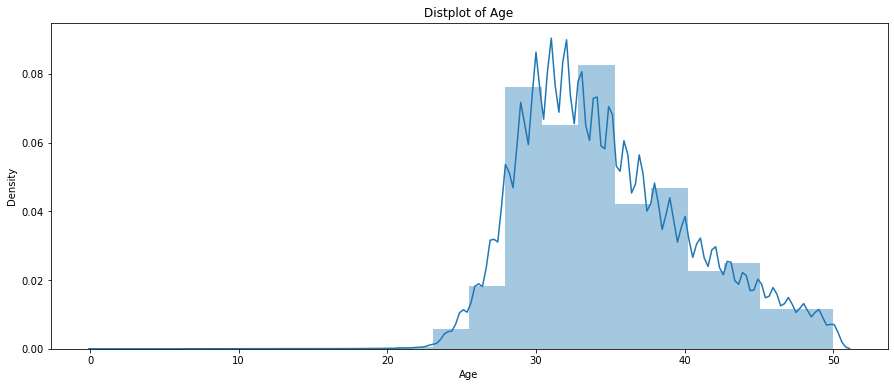

In [40]:
plt.figure(1, figsize = (15,6)) 
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
sn.distplot(df['Age'], bins = 20)
plt.title('Distplot of {}'.format('Age'))
plt.show()

_Distplot above shows the age density for the data we analysing._

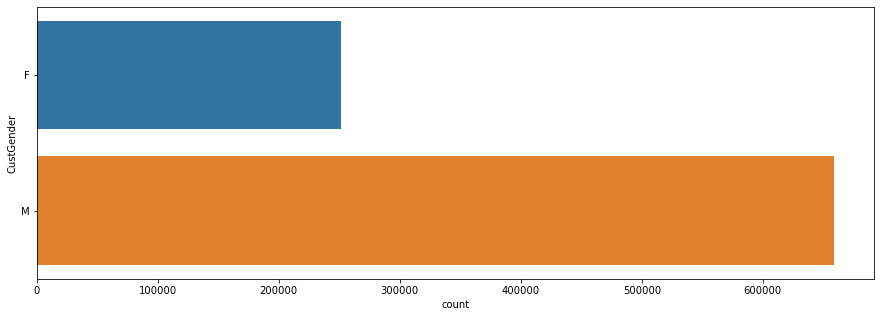

In [41]:
plt.figure(figsize = (15,5))
sn.countplot(y = 'CustGender', data = df)
plt.show()

_The number of male that we have in our data is more than the number of females_

Text(0.5, 1.0, 'Percentage distribution of customerGender')

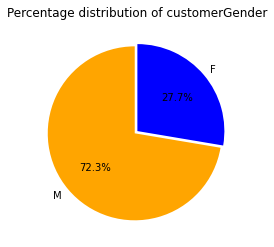

In [42]:

values = df['CustGender'].value_counts()/df.shape[0]
labels = (df['CustGender'].value_counts()/df.shape[0]).index
colors = ['orange', 'blue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0), colors=colors)
plt.title('Percentage distribution of customerGender')

_The Pie chart above shows the pecentage differnce between to genders for the given data, with males being the dominating gender group._

In [43]:
#sns.barplot(data=df,x="CustLocation",y='TransactionAmount (INR)',palette='Set2',hue='CustGender')
#plt.title('Location Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

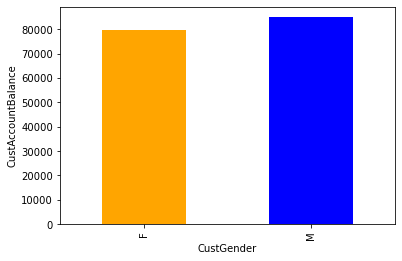

In [44]:
ax = df.groupby('CustGender')['CustAccountBalance'].mean().plot(kind='bar',color=['orange', 'blue'])
plt.ylabel('CustAccountBalance');

_Males have slightly hegher bank customer account balance than females_

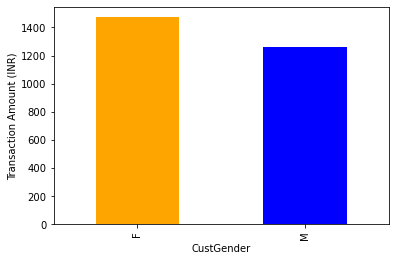

In [45]:
ax = df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(kind='bar',color=['orange', 'blue'])
plt.ylabel('Transaction Amount (INR)');

_Females have higher transaction amount than males, this simply means that females are the ones that are spending more._

<AxesSubplot:xlabel='Age', ylabel='CustAccountBalance'>

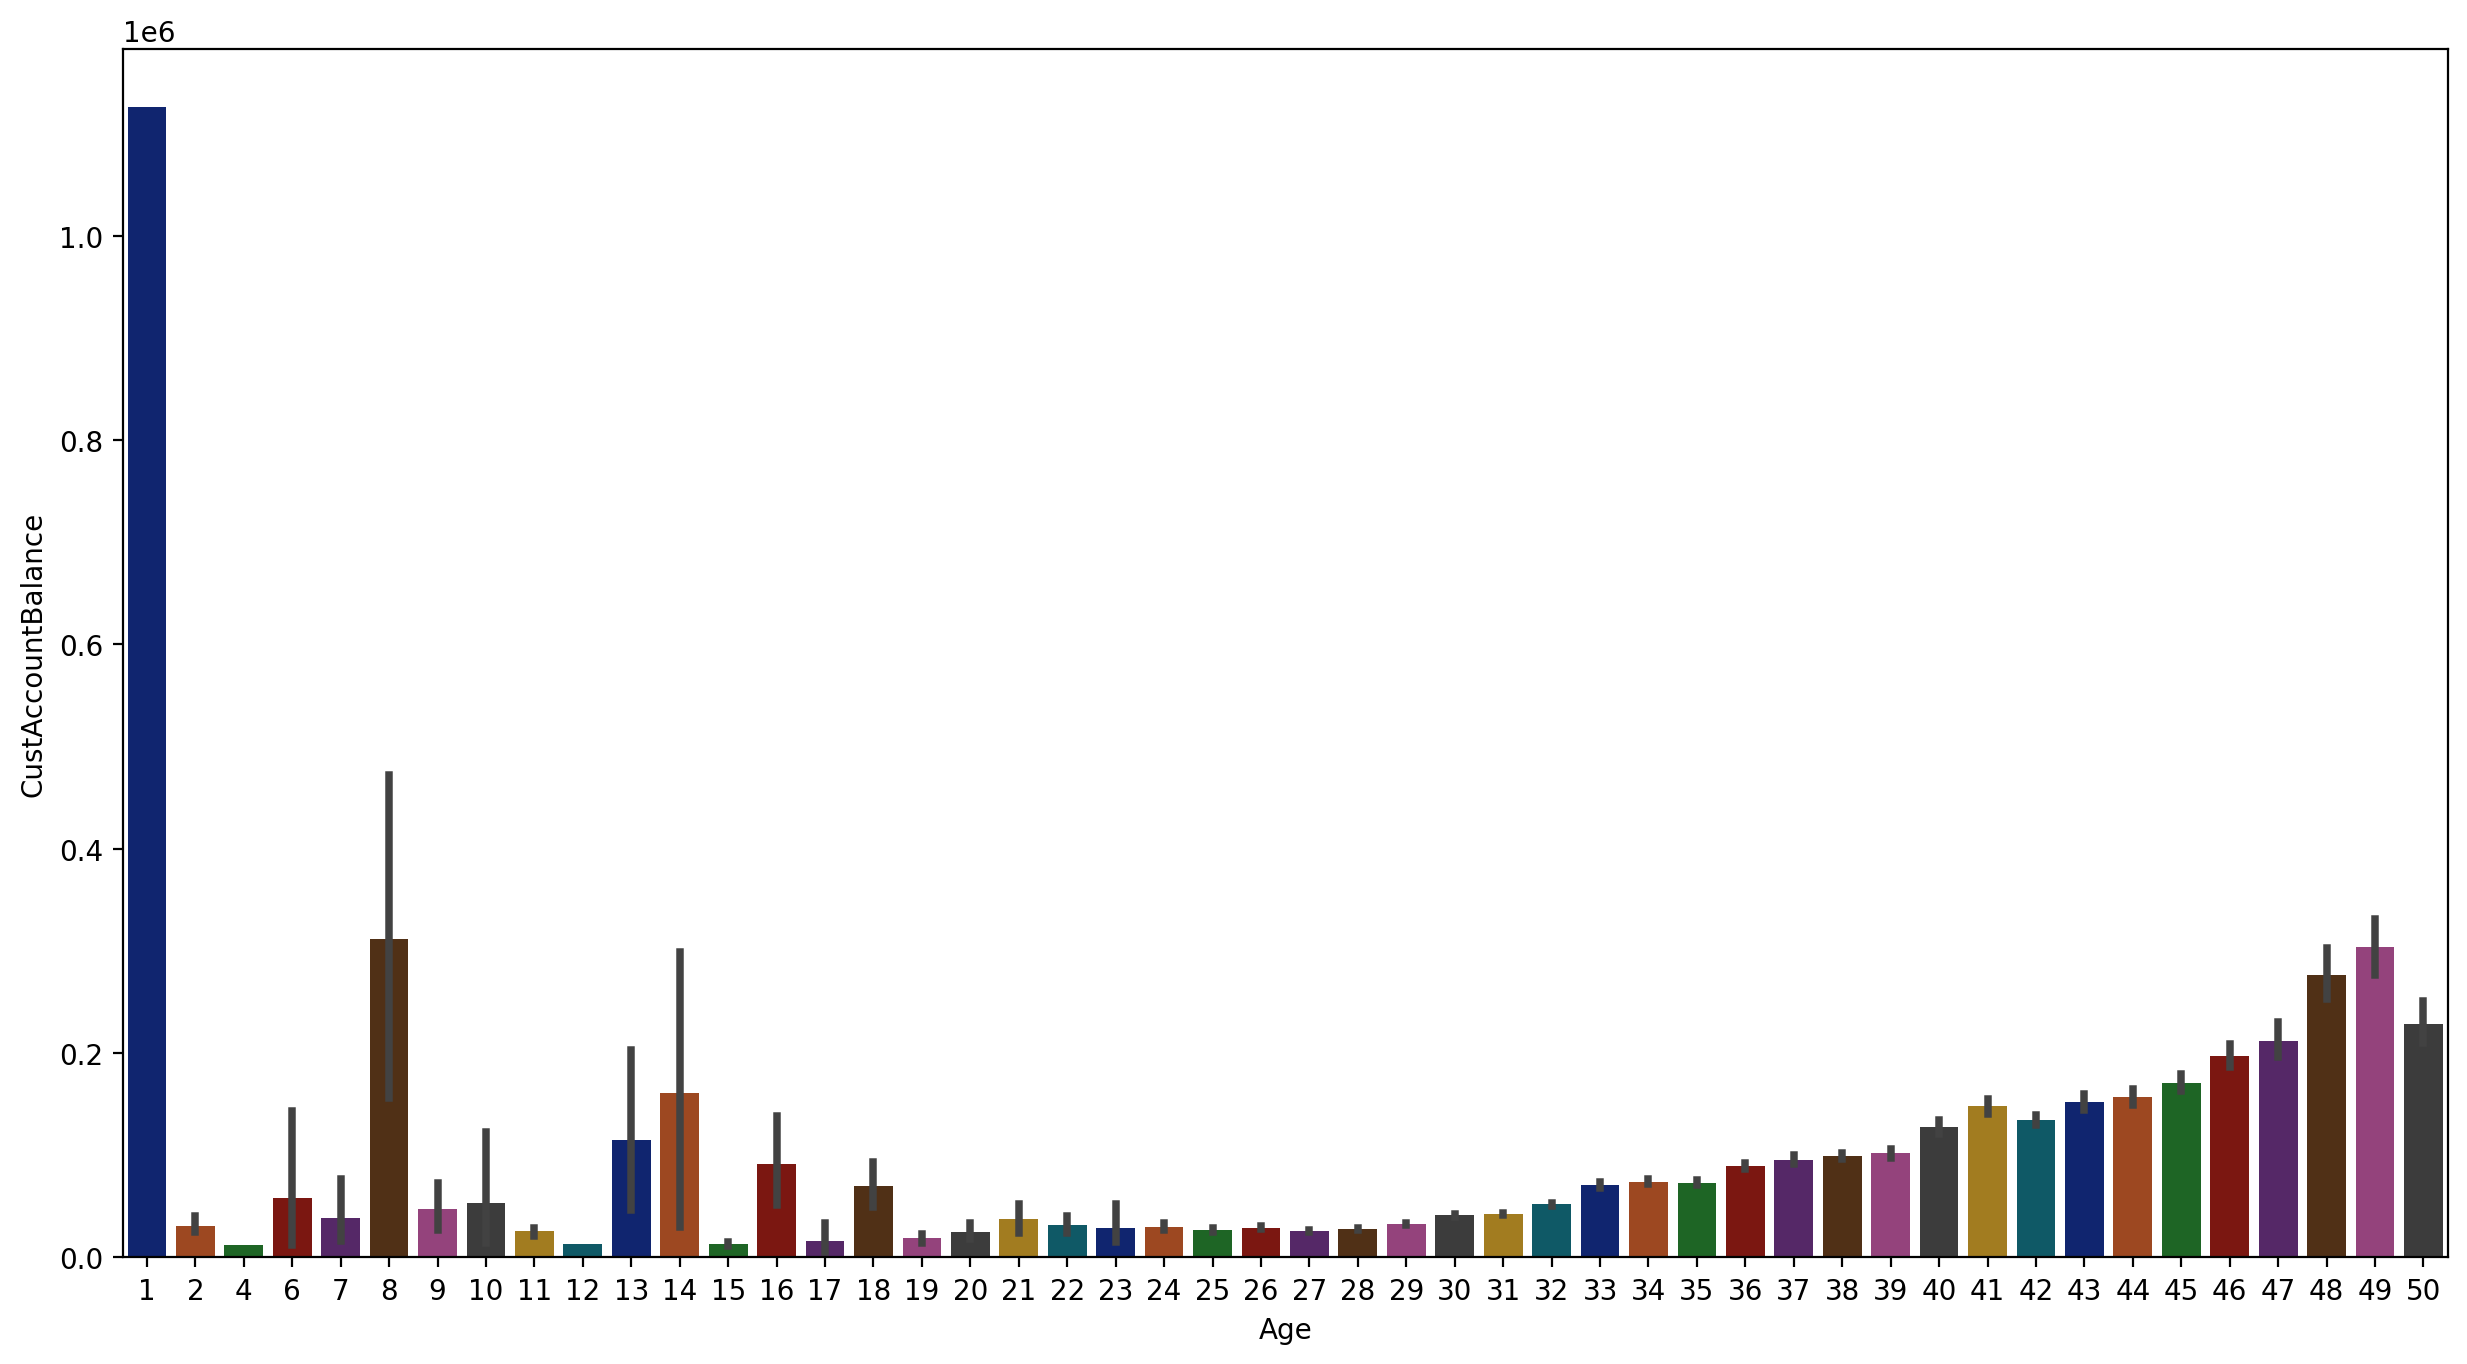

In [46]:
plt.figure(figsize=(15,8),dpi=200)
sn.barplot(data=df,x='Age',y='CustAccountBalance',palette='dark')

_The bar plot above show the account balance for both males and females, this show that they both start to save or have an increase in thier account balance as they grow starting from age 25 to 49, before 25 we ca not really tell what the trend is._

<AxesSubplot:xlabel='Age', ylabel='TransactionAmount (INR)'>

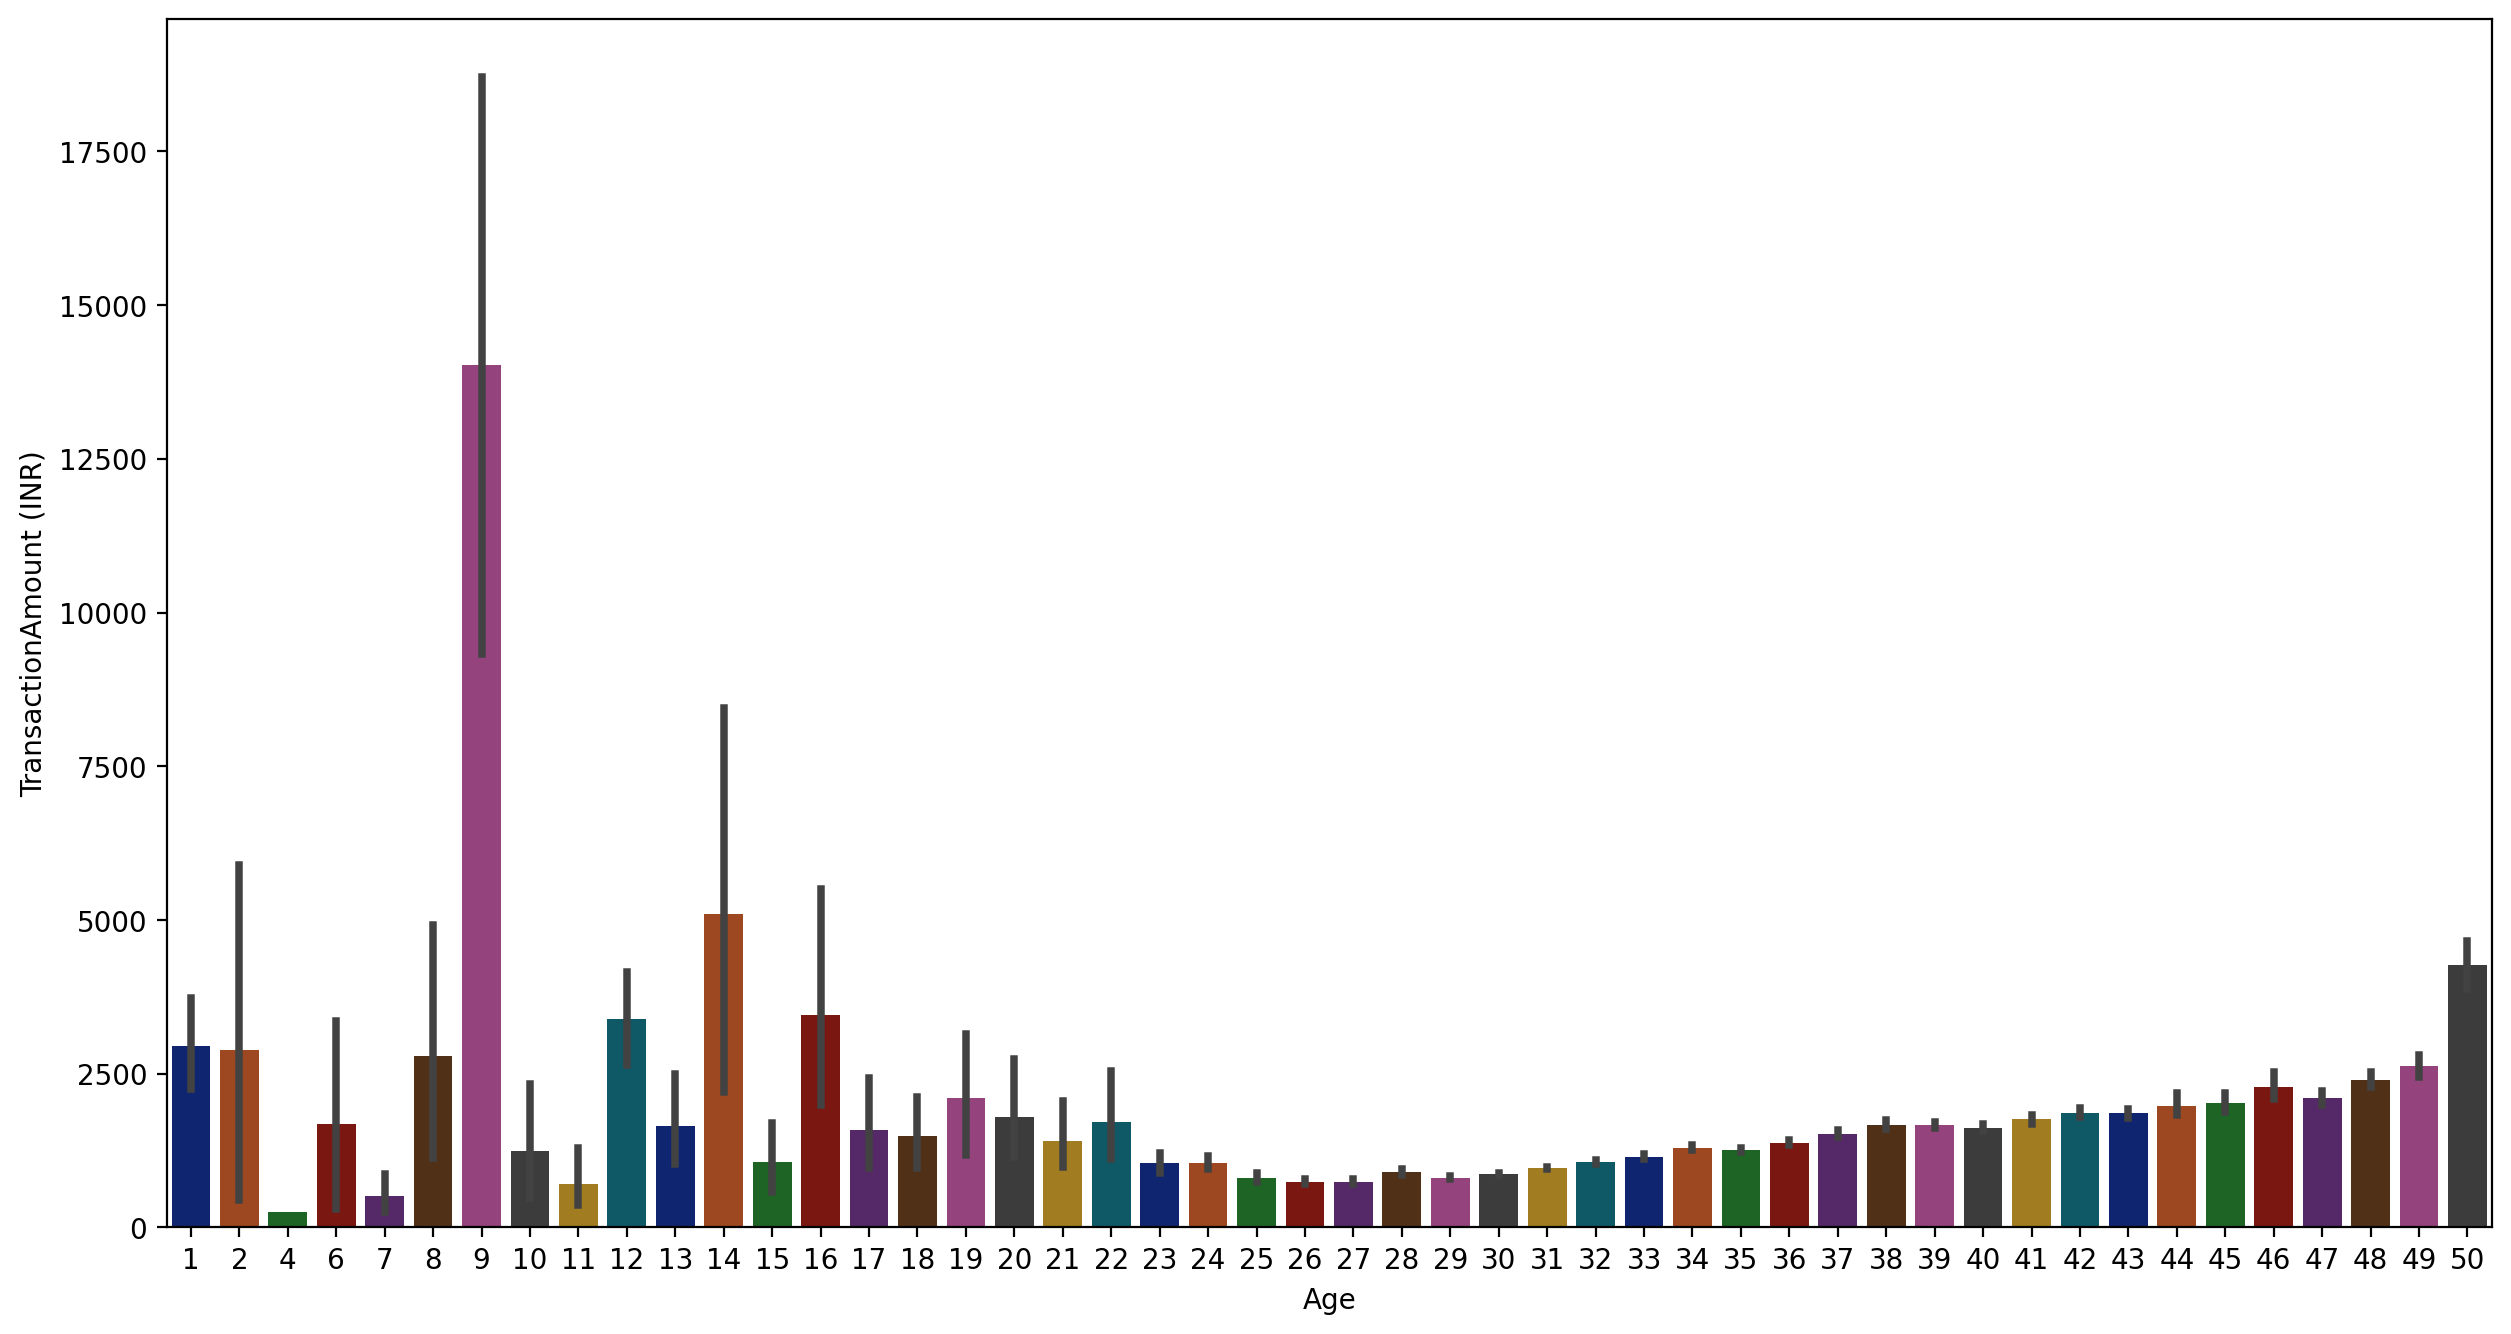

In [47]:
plt.figure(figsize=(15,8),dpi=200)
sn.barplot(data=df,x='Age',y='TransactionAmount (INR)',palette='dark')

The bar plot above show the transaction amount for both males and females, this show a slight increase in transacting habit.

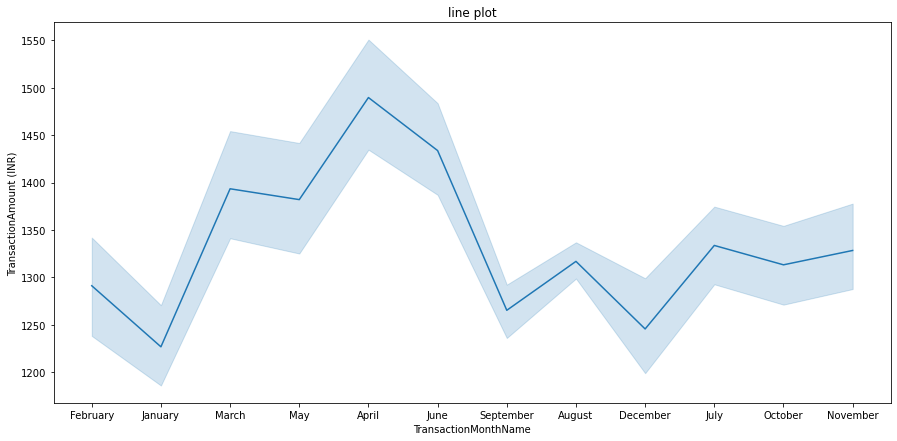

In [48]:
plt.figure(1, figsize= (15,7))
#sn.set(style = 'whitegrid')
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
sn.lineplot(x ='TransactionMonthName', y = 'TransactionAmount (INR)', data = df)
plt.title('line plot')
plt.show()


_The line plot above shows that transactions throughout a year, with more transaction happening month of April._

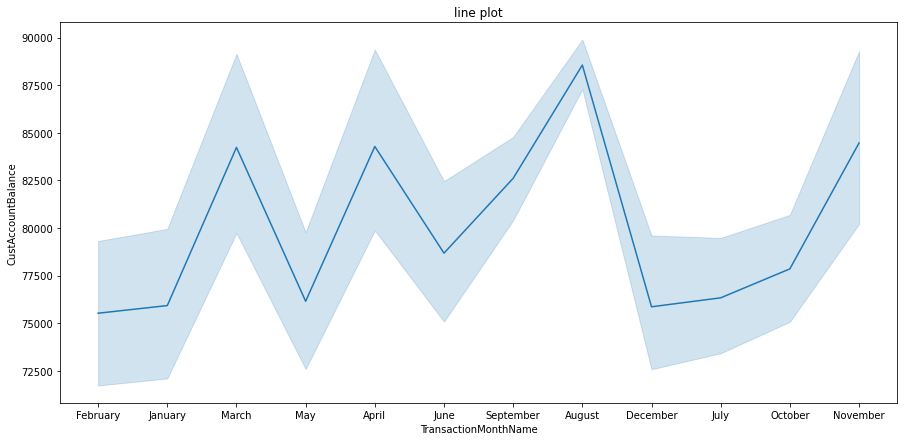

In [49]:
plt.figure(1, figsize= (15,7))
#sn.set(style = 'whitegrid')
plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
sn.lineplot(x ='TransactionMonthName', y = 'CustAccountBalance', data = df)
plt.title('line plot')
plt.show()

_The line plot above shows that customer bank balnce throughtout a year, there are several hikes in balances, but the biggest hike is on moth of August._

In [50]:
#sn.barplot(data=df,x='TransactionMonthName',y='CustAccountBalance',palette='Spectral',hue='CustGender')
#plt.title('Monthly Comparison of Account Balances of Male & Female Customers',fontsize=32,fontweight='bold',color='sienna',pad=30);

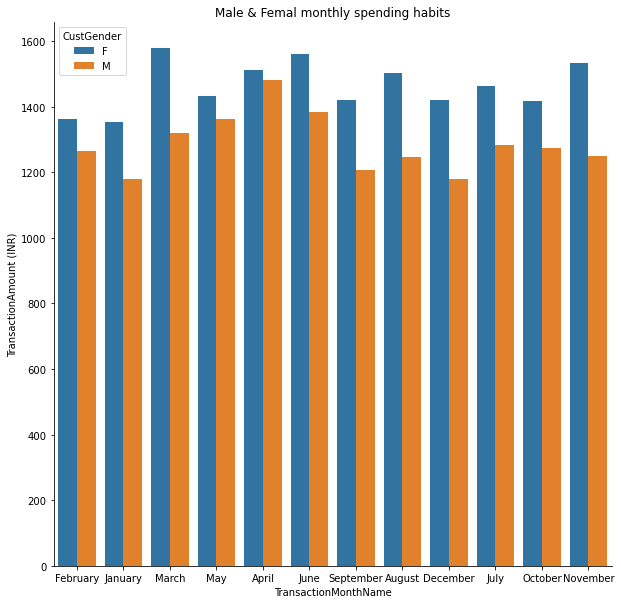

In [51]:
# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
ax = sn.barplot(
    x ="TransactionMonthName", 
    y="TransactionAmount (INR)", 
    hue="CustGender", 
    data=df, 
    ci=None
    )

# Customize the axes and title
ax.set_title("Male & Femal monthly spending habits")
ax.set_ylabel("TransactionAmount (INR)")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

_The bar plot above shows the monthly spending habits for both genders. It is clear that females spend more than males in all months of the year._

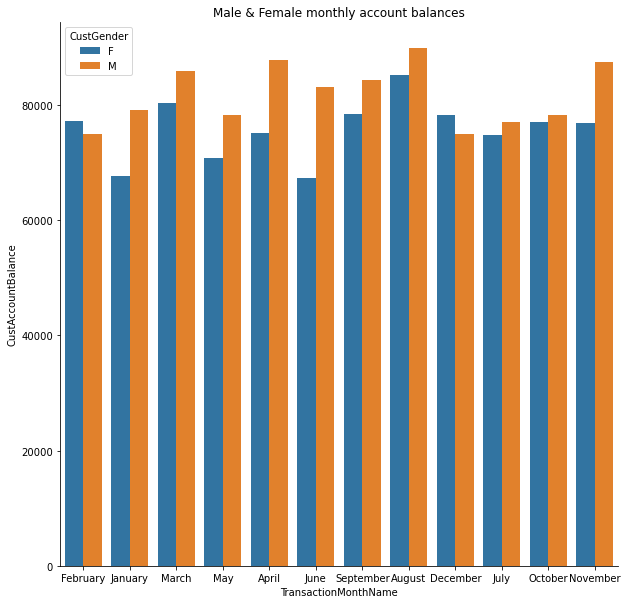

In [52]:
# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
ax = sn.barplot(
    x ="TransactionMonthName", 
    y="CustAccountBalance", 
    hue="CustGender", 
    data=df, 
    ci=None
    )

# Customize the axes and title
ax.set_title("Male & Female monthly account balances")
ax.set_ylabel("CustAccountBalance")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

_The bar plot above shows the monthly account balances for both genders. It is clear on average that males have more account balances females._

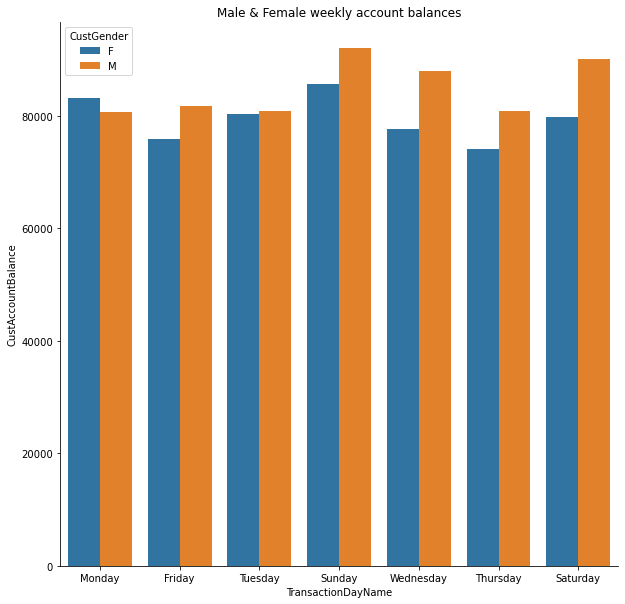

In [53]:
# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
ax = sn.barplot(
    x ="TransactionDayName", 
    y="CustAccountBalance", 
    hue="CustGender", 
    data=df, 
    ci=None
    )

# Customize the axes and title
ax.set_title("Male & Female weekly account balances")
ax.set_ylabel("CustAccountBalance")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

_Male & Female weekly account balances_

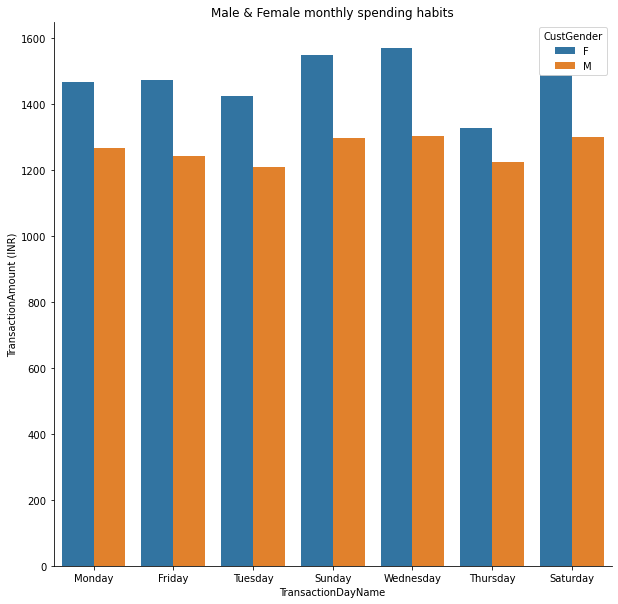

In [54]:
# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
ax = sn.barplot(
    x ="TransactionDayName", 
    y="TransactionAmount (INR)", 
    hue="CustGender", 
    data=df, 
    ci=None
    )

# Customize the axes and title
ax.set_title("Male & Female monthly spending habits")
ax.set_ylabel("TransactionAmount (INR)")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

_Male & Female monthly spending habits_

##### Transaction Amount and Customer Account Balance per Customer Location

In [55]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName,Transitionhr
0,F,JAMSHEDPUR,17819.05,143207,25.0,27,February,Monday,17
2,F,MUMBAI,17874.44,142712,459.0,25,February,Monday,17
3,F,MUMBAI,866503.21,142714,2060.0,48,February,Monday,17
4,F,NAVI MUMBAI,6714.43,181156,1762.5,34,February,Monday,4
5,F,ITANAGAR,53609.20,173940,676.0,50,February,Monday,2


##### The code below takes time to run on my pc, wanted to show the grouped barplot per locattion of the account balce, and the gender.

In [56]:

#g = sn.catplot(
    #data=df, kind="bar",
    #x="CustLocation", y="CustAccountBalance", hue="CustGender",
    #ci="sd", palette="dark", alpha=.6, height)
#g.despine(left=True)
#g.set_axis_labels("CustLocation", "CustAccountBalance")
#g.legend.set_title("")

## 5 Modelling

_The scatter plot does not really show the possible clustering groups that could be there._

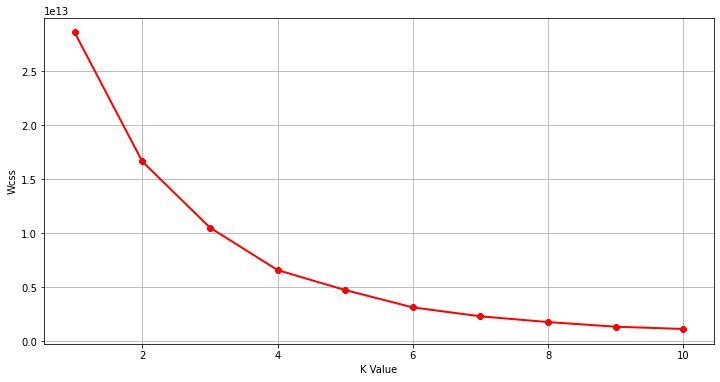

In [57]:
X1 = df.loc[:, ['Age', 'TransactionAmount (INR)']].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth =2, color ='red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('Wcss')
plt.show()

In [58]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','TransactionAmount (INR)']])
    sse.append(km.inertia_)

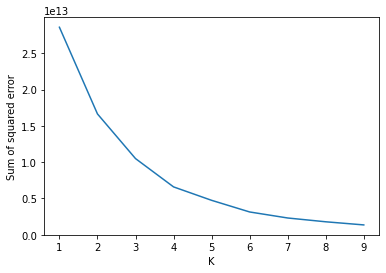

In [59]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [60]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(df[['Age', 'TransactionAmount (INR)']])
label

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
#tr = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vTP6Lbyw2u_hVCnwkPyzPIS90jJFGrmzMG8oZFR4Sji0TLMrYMOOfdkBxaCaDST6Fk-Hkqn6WQV0Njr/pubhtml?gid=0&single=true')

In [62]:
df['Cluster'] = label
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName,Transitionhr,Cluster
0,F,JAMSHEDPUR,17819.05,143207,25.0,27,February,Monday,17,0
2,F,MUMBAI,17874.44,142712,459.0,25,February,Monday,17,0
3,F,MUMBAI,866503.21,142714,2060.0,48,February,Monday,17,0
4,F,NAVI MUMBAI,6714.43,181156,1762.5,34,February,Monday,4,0
5,F,ITANAGAR,53609.20,173940,676.0,50,February,Monday,2,0


In [63]:
kmeans.cluster_centers_

array([[3.47704104e+01, 9.16210991e+02],
       [3.88344498e+01, 9.41492693e+04],
       [3.70825927e+01, 2.27449771e+04],
       [3.91111111e+01, 6.41415042e+05]])

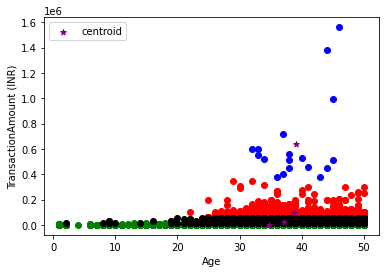

In [64]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
plt.scatter(df1.Age,df1['TransactionAmount (INR)'],color='green')
plt.scatter(df2.Age,df2['TransactionAmount (INR)'],color='red')
plt.scatter(df3.Age,df3['TransactionAmount (INR)'],color='black')
plt.scatter(df4.Age,df4['TransactionAmount (INR)'],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('TransactionAmount (INR)')
plt.legend()

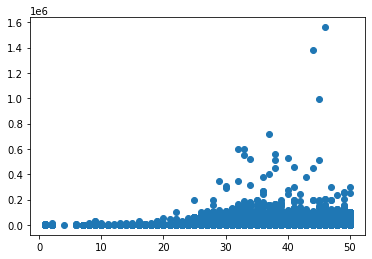

In [65]:
plt.scatter(df['Age'], df['TransactionAmount (INR)'])

##### Preprocessing using min max scaler

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['TransactionAmount (INR)']])
df['TransactionAmount (INR)'] = scaler.transform(df[['TransactionAmount (INR)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['CustAccountBalance']])
df['CustAccountBalance'] = scaler.transform(df[['CustAccountBalance']])


In [67]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName,Transitionhr,Cluster
0,F,JAMSHEDPUR,0.000413,143207,0.000016,0.530612,February,Monday,17,0
2,F,MUMBAI,0.000414,142712,0.000294,0.489796,February,Monday,17,0
3,F,MUMBAI,0.020074,142714,0.001320,0.959184,February,Monday,17,0
4,F,NAVI MUMBAI,0.000156,181156,0.001130,0.673469,February,Monday,4,0
5,F,ITANAGAR,0.001242,173940,0.000433,1.000000,February,Monday,2,0


_Scaled TransactionAmount (INR)_

In [68]:
kmeans2 = KMeans(n_clusters = 4)
label2 = kmeans2.fit_predict(df[['Age', 'TransactionAmount (INR)']])
label2

array([2, 2, 0, ..., 1, 0, 3])

In [69]:
df['Cluster2'] = label2
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName,Transitionhr,Cluster,Cluster2
0,F,JAMSHEDPUR,0.000413,143207,0.000016,0.530612,February,Monday,17,0,2
2,F,MUMBAI,0.000414,142712,0.000294,0.489796,February,Monday,17,0,2
3,F,MUMBAI,0.020074,142714,0.001320,0.959184,February,Monday,17,0,0
4,F,NAVI MUMBAI,0.000156,181156,0.001130,0.673469,February,Monday,4,0,1
5,F,ITANAGAR,0.001242,173940,0.000433,1.000000,February,Monday,2,0,0


In [70]:
kmeans2.cluster_centers_

array([[8.98412105e-01, 1.38990262e-03],
       [6.50509048e-01, 7.29425242e-04],
       [5.58351469e-01, 5.40471321e-04],
       [7.58021184e-01, 1.01111520e-03]])

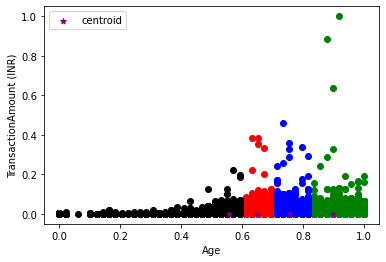

In [71]:
df1 = df[df.Cluster2==0]
df2 = df[df.Cluster2==1]
df3 = df[df.Cluster2==2]
df4 = df[df.Cluster2==3]
plt.scatter(df1.Age,df1['TransactionAmount (INR)'],color='green')
plt.scatter(df2.Age,df2['TransactionAmount (INR)'],color='red')
plt.scatter(df3.Age,df3['TransactionAmount (INR)'],color='black')
plt.scatter(df4.Age,df4['TransactionAmount (INR)'],color='blue')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('TransactionAmount (INR)')
plt.legend()

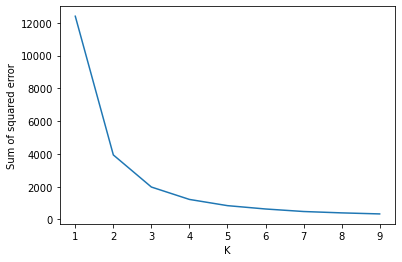

In [72]:
sse2 = []
k_rng = range(1,10)
for k in k_rng:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['Age','CustAccountBalance']])
    sse2.append(km2.inertia_)
    
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse2)

In [73]:
kmeans3 = KMeans(n_clusters = 4)
label3 = kmeans3.fit_predict(df[['Age', 'CustAccountBalance']])
label3

array([0, 0, 1, ..., 3, 1, 2])

In [74]:
df['Cluster3'] = label3
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransactionMonthName,TransactionDayName,Transitionhr,Cluster,Cluster2,Cluster3
0,F,JAMSHEDPUR,0.000413,143207,0.000016,0.530612,February,Monday,17,0,2,0
2,F,MUMBAI,0.000414,142712,0.000294,0.489796,February,Monday,17,0,2,0
3,F,MUMBAI,0.020074,142714,0.001320,0.959184,February,Monday,17,0,0,1
4,F,NAVI MUMBAI,0.000156,181156,0.001130,0.673469,February,Monday,4,0,1,3
5,F,ITANAGAR,0.001242,173940,0.000433,1.000000,February,Monday,2,0,0,1


In [75]:
kmeans3.cluster_centers_

array([[5.58351469e-01, 7.67270632e-04],
       [8.98411480e-01, 4.32172090e-03],
       [7.58020924e-01, 2.45800232e-03],
       [6.50509048e-01, 1.42147585e-03]])

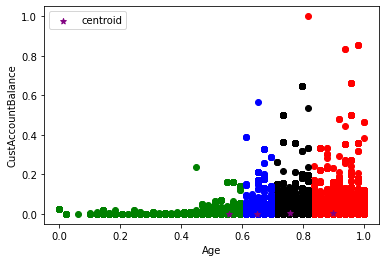

In [76]:
df1 = df[df.Cluster3==0]
df2 = df[df.Cluster3==1]
df3 = df[df.Cluster3==2]
df4 = df[df.Cluster3==3]
plt.scatter(df1.Age,df1['CustAccountBalance'],color='green')
plt.scatter(df2.Age,df2['CustAccountBalance'],color='red')
plt.scatter(df3.Age,df3['CustAccountBalance'],color='black')
plt.scatter(df4.Age,df4['CustAccountBalance'],color='blue')
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('CustAccountBalance')
plt.legend()

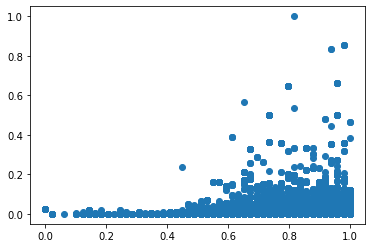

In [77]:
plt.scatter(df.Age,df['CustAccountBalance'])

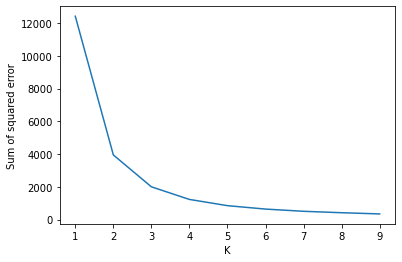

In [78]:
sse3 = []
k_rng = range(1,10)
for k in k_rng:
    km3 = KMeans(n_clusters=k)
    km3.fit(df[['Age','TransactionAmount (INR)','CustAccountBalance']])
    sse3.append(km3.inertia_)
    
    
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse3)

In [79]:
kmeans4 = KMeans(n_clusters = 4)
label4 = kmeans4.fit_predict(df[['Age', 'TransactionAmount (INR)', 'CustAccountBalance']])
label4

array([3, 3, 2, ..., 1, 2, 0])

In [80]:
kmeans4.cluster_centers_

array([[7.78254655e-01, 1.06506011e-03, 2.63715984e-03],
       [6.69745911e-01, 7.79913679e-04, 1.62809813e-03],
       [9.12419674e-01, 1.43360224e-03, 4.58766637e-03],
       [5.71416187e-01, 5.59640467e-04, 8.20050448e-04]])

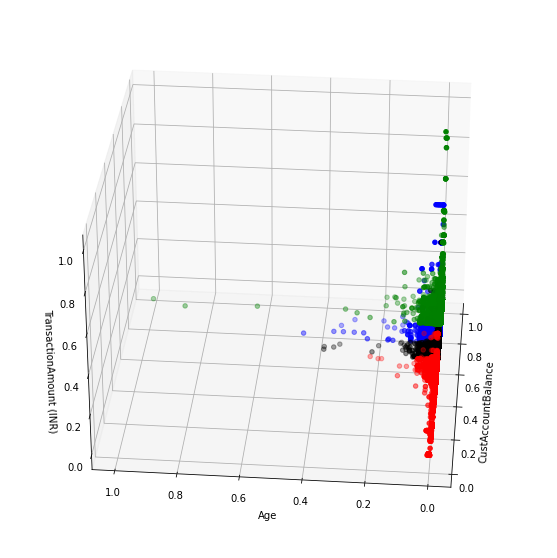

In [81]:
clusters4 = kmeans4.fit_predict(df[['Age', 'TransactionAmount (INR)', 'CustAccountBalance']])
df['lab'] = clusters4

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.lab == 0], df['TransactionAmount (INR)'][df.lab == 0],df['CustAccountBalance'][df.lab == 0], c = 'red',label='A')
ax.scatter(df.Age[df.lab == 1], df['TransactionAmount (INR)'][df.lab == 1],df['CustAccountBalance'][df.lab == 1], c = 'blue',label='A')
ax.scatter(df.Age[df.lab == 2], df['TransactionAmount (INR)'][df.lab == 2],df['CustAccountBalance'][df.lab == 2], c = 'black',label='A')
ax.scatter(df.Age[df.lab == 3], df['TransactionAmount (INR)'][df.lab == 3],df['CustAccountBalance'][df.lab == 3], c = 'green',label='A') 
ax.view_init(30,185)

plt.ylabel('Age')
plt.xlabel('CustAccountBalance')
ax.set_zlabel('TransactionAmount (INR)')
plt.show()

## 6 Model Validation

In [82]:
import sklearn.metrics as metrics

In [83]:
df_Short = df[['Age', 'TransactionAmount (INR)', 'CustAccountBalance']]
df_Short.head()


,Age,TransactionAmount (INR),CustAccountBalance
0,0.530612,0.000016,0.000413
2,0.489796,0.000294,0.000414
3,0.959184,0.001320,0.020074
4,0.673469,0.001130,0.000156
5,1.000000,0.000433,0.001242


In [84]:
for i in range(3,7):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.5664488816280656
Silhouette score for k(clusters) = 4 is 0.5384511617048142
Silhouette score for k(clusters) = 5 is 0.5382431677916174
Silhouette score for k(clusters) = 6 is 0.5505918724127181
